In [1]:
# !pip install selectivesearch
# !pip install torch_snippets
# !pip install -q --upgrade selectivesearch torch_snippets

In [2]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

In [3]:
# !wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
# img = read('Hemanvi.jpeg', 1)

In [4]:
# img = read('../pic/源赖氏佐田.jfif', 1) # 杂牌格式，读不进来

In [5]:
img = read('../pic/girl.jpg', 1)

In [6]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

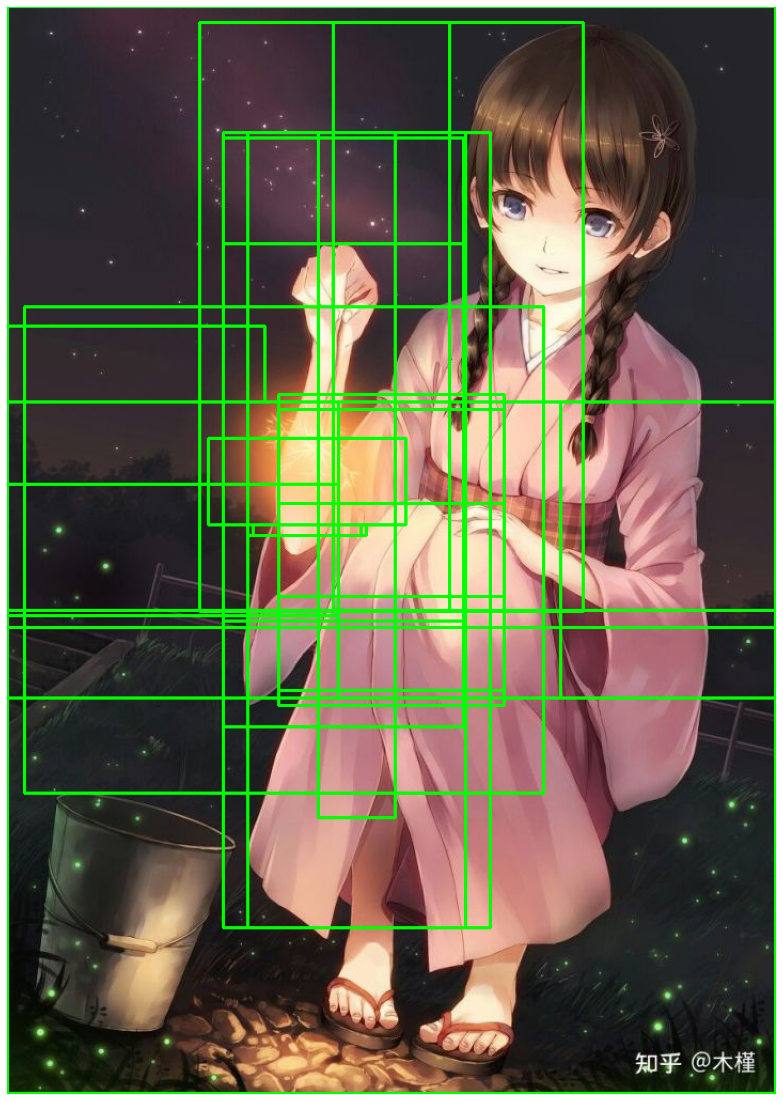

In [9]:
candidates = extract_candidates(img)
show(img, bbs = candidates)